In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os

notebook_dir = Path().resolve()
os.chdir(notebook_dir)

In [3]:
from data_loading import standardise_month_jsons
standardise_month_jsons()

Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\AUGUST_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\OCTOBER_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\NOVEMBER_standardised.json


In [4]:
from data_loading import load_month_data, generate_derived_features
import pandas as pd
data = load_month_data()
data_derived = generate_derived_features(data)

In [5]:
def print_col_stats(df, col):
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nValue counts:\n{df[col].value_counts()}\n\n\n\n")

In [6]:
print_col_stats(data_derived, "recovery_ratio")
print_col_stats(data_derived, "supplier")

Column: recovery_ratio
Data type: float64
Missing values: 0
Unique values: 452

Value counts:
recovery_ratio
0.750000    11
0.738095     8
0.714286     7
0.692308     7
0.717949     7
            ..
0.620253     1
0.584416     1
0.541667     1
0.608333     1
0.645570     1
Name: count, Length: 452, dtype: int64




Column: supplier
Data type: object
Missing values: 0
Unique values: 7

Value counts:
supplier
tom             126
dic             119
har             115
Mary Therese     61
Mary Jane        59
Mary Anne        52
Mary             46
Name: count, dtype: int64






In [7]:
data_derived['supplier']

time_start_index
2022-08-01 08:29:00             har
2022-08-01 09:27:00             dic
2022-08-01 11:38:00             har
2022-08-01 12:40:00             tom
2022-08-01 14:25:00             dic
                           ...     
2022-11-30 11:27:00       Mary Anne
2022-11-30 12:25:00            Mary
2022-11-30 13:30:00             tom
2022-11-30 14:28:00    Mary Therese
2022-11-30 15:50:00             tom
Name: supplier, Length: 578, dtype: object

In [8]:
from visualisation import generate_plots, scatter_coloured, density_scatter, display_simple_model_with_lgbm_and_density_scatter
#generate_plots(data_derived)

In [9]:
data_derived_without_supplied_m3 = data_derived.drop(columns=["supplied_m3"], inplace=False)

In [10]:
interesting_combinations_no_supplied_target_recover_m3 = [
    # Does longer process time mean more recovery? Does facility matter?
    ("process_time_mins", "start_hour", "recovery_ratio"),
    # Do certain days of the week consistently yield more recovery?
    ("start_day_week", "process_time_mins", "recovery_ratio"),
    # Is recovery driven more by supplier or time of day?
    ("supplier", "start_hour", "recovery_ratio"),
    # Does the facility and time of day together predict recovery?
    ("facility", "start_hour", "recovery_ratio"),
    # Does month and day of week reveal seasonal/weekly recovery patterns?
    ("month", "start_day_week", "recovery_ratio"),
    # Does supplier behaviour differ between facilities?
    ("supplier", "facility", "recovery_ratio"),
    # Does starting later in the day at a given facility reduce recovery?
    ("facility", "process_time_mins", "recovery_ratio"),
]

interesting_combinations_with_supplied_m3 = [
    ("supplier", "supplied_m3", "recovery_ratio"),
    ("supplier", "recovery_ratio", "supplied_m3"),
]


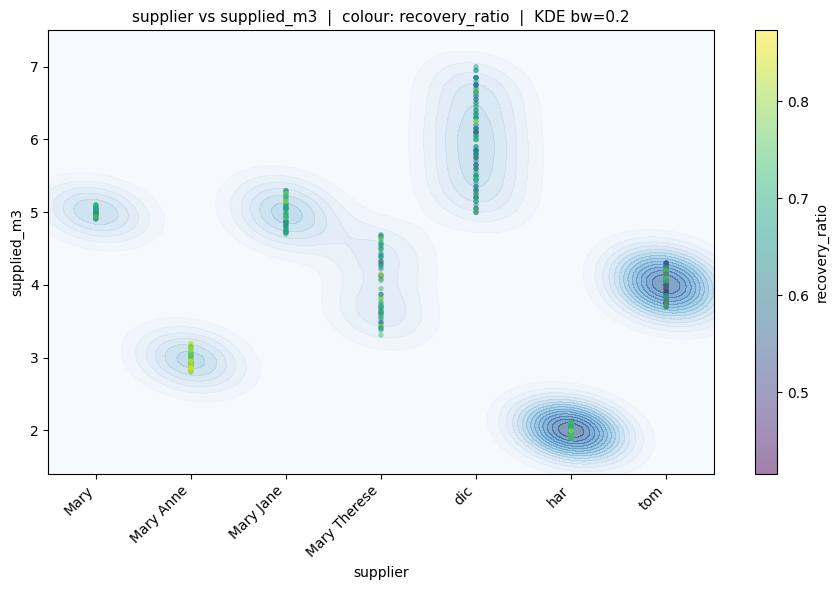

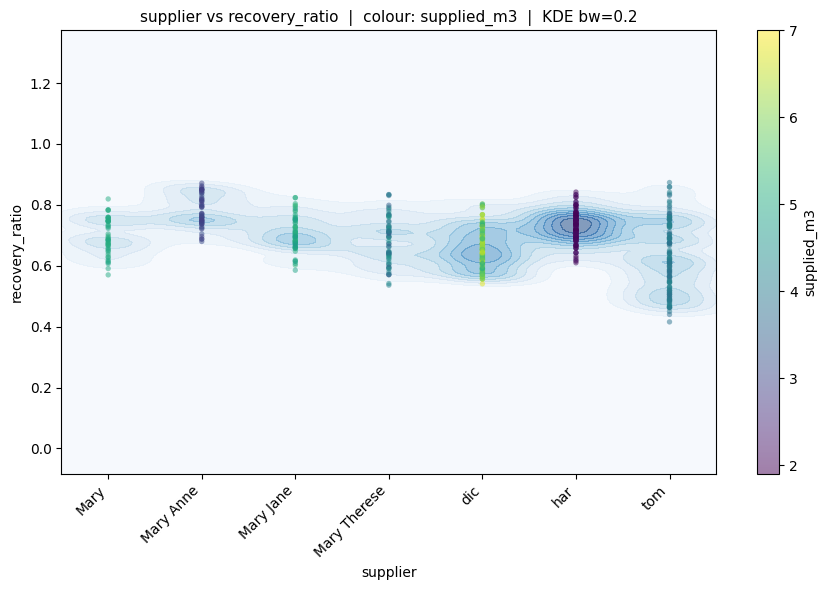

In [11]:
for x_col, y_col, target in interesting_combinations_with_supplied_m3:
    density_scatter(data_derived, x_col, y_col, target, bw = 0.2, alpha=0.5)

In [12]:
from statistical_comparision import analyze_condition_impact, compare_two_conditions, print_impact_summary

# Compare one supplier vs all others
results = analyze_condition_impact(data_derived, "supplier", "Mary")
#print_impact_summary(results)

# Compare two specific suppliers
results = compare_two_conditions(data_derived, "supplier", "Mary", "Mary Anne")
print_impact_summary(results, alpha=0.9)

SIGNIFICANT FINDINGS (p < 0.9): 8/10

Column: supplied_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovered_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovery_ratio
  Test: mann_whitney_u, p-value: 0.0000000027
  Effect size: -0.699 (large)
  Suggested viz: boxplot

Column: process_time_mins
  Test: mann_whitney_u, p-value: 0.0000001698
  Effect size: 0.614 (large)
  Suggested viz: boxplot

Column: time_start_hour_minute
  Test: mann_whitney_u, p-value: 0.2986295677
  Effect size: -0.122 (small)
  Suggested viz: boxplot

Column: time_end
  Test: chi_square, p-value: 0.4524803890
  Effect size: 1.000 (large)
  Suggested viz: stacked_bar

Column: time_start
  Test: mann_whitney_u, p-value: 0.8170403006
  Effect size: -0.028 (small)
  Suggested viz: boxplot

Column: date
  Test: chi_square, p-value: 0.8234094029
  Effect size: 0.637 (large)
  Suggested